In [ ]:
# Crear archivo __init__.py dentro de la carpeta src/
!touch /content/drive/MyDrive/tarea-redes-neuronales-final/src/__init__.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/tarea-redes-neuronales-final
Epoch 0, Loss: 0.9769
Epoch 100, Loss: 0.9729
Epoch 200, Loss: 0.9673
Epoch 300, Loss: 0.9602
Epoch 400, Loss: 0.9512
Epoch 500, Loss: 0.9425
Epoch 600, Loss: 0.9350
Epoch 700, Loss: 0.9256
Epoch 800, Loss: 0.9151
Epoch 900, Loss: 0.9037
Epoch 0, Loss: 1.2810
Epoch 100, Loss: 1.2340
Epoch 200, Loss: 1.1950
Epoch 300, Loss: 1.1629
Epoch 400, Loss: 1.1366
Epoch 500, Loss: 1.1151
Epoch 600, Loss: 1.0975
Epoch 700, Loss: 1.0830
Epoch 800, Loss: 1.0710
Epoch 900, Loss: 1.0610
Epoch 0, Loss: 1.4714
Epoch 100, Loss: 1.1968
Epoch 200, Loss: 0.9865
Epoch 300, Loss: 0.8251
Epoch 400, Loss: 0.6990
Epoch 500, Loss: 0.5983
Epoch 600, Loss: 0.5165
Epoch 700, Loss: 0.4491
Epoch 800, Loss: 0.3935
Epoch 900, Loss: 0.3473
           configuracion       MSE       MAE
0      relu [7, 8, 4, 1]  0.825289  0.771832
1  sigmoid [7, 

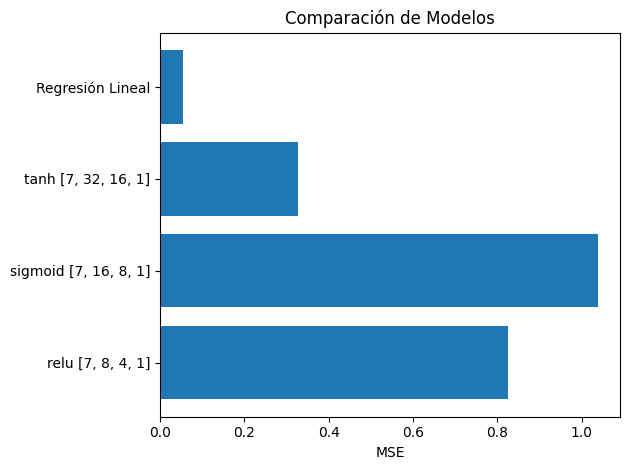

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Ir al directorio del proyecto
%cd /content/drive/MyDrive/tarea-redes-neuronales-final

# Añadir la carpeta actual al path de Python
import sys
sys.path.append('/content/drive/MyDrive/tarea-redes-neuronales-final')


from src.neural_network import NeuralNetwork
from src.data_preprocessing import cargar_y_preprocesar
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd

X_train, X_test, y_train, y_test = cargar_y_preprocesar()
configs = [
    {"layers": [X_train.shape[1], 8, 4, 1], "activation": "relu"},
    {"layers": [X_train.shape[1], 16, 8, 1], "activation": "sigmoid"},
    {"layers": [X_train.shape[1], 32, 16, 1], "activation": "tanh"},
]
resultados = []
for config in configs:
    modelo = NeuralNetwork(layers=config["layers"], activation=config["activation"])
    modelo.train(X_train, y_train, epochs=1000, learning_rate=0.001)
    y_pred, _ = modelo.forward(X_test)
    y_pred = y_pred[-1]
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    resultados.append({
        "configuracion": f"{config['activation']} {config['layers']}",
        "MSE": mse,
        "MAE": mae
    })

base = LinearRegression()
base.fit(X_train, y_train)
y_pred_base = base.predict(X_test)
resultados.append({
    "configuracion": "Regresión Lineal",
    "MSE": mean_squared_error(y_test, y_pred_base),
    "MAE": mean_absolute_error(y_test, y_pred_base)
})

df_resultados = pd.DataFrame(resultados)
df_resultados.to_csv("results/performance_comparison.csv", index=False)
print(df_resultados)

plt.barh(df_resultados["configuracion"], df_resultados["MSE"])
plt.xlabel("MSE")
plt.title("Comparación de Modelos")
plt.tight_layout()
plt.savefig("results/architecture_analysis.png")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
